# Python Packages

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Imported Datasets

In [2]:
# Defined file paths
train_file_path = "Fraudulent_E-Commerce_Transaction_Data.csv"
test_file_path = "Fraudulent_E-Commerce_Transaction_Data_2.csv"

# Loading train dataset
train_df = pd.read_csv(train_file_path)

# Loading test dataset
test_df = pd.read_csv(test_file_path)

# Displaying the first few rows of each dataset
print("Train dataset:")
print(train_df.head())
print("\nTest dataset:")
print(test_df.head())

Train dataset:
                         Transaction ID                           Customer ID  \
0  15d2e414-8735-46fc-9e02-80b472b2580f  d1b87f62-51b2-493b-ad6a-77e0fe13e785   
1  0bfee1a0-6d5e-40da-a446-d04e73b1b177  37de64d5-e901-4a56-9ea0-af0c24c069cf   
2  e588eef4-b754-468e-9d90-d0e0abfc1af0  1bac88d6-4b22-409a-a06b-425119c57225   
3  4de46e52-60c3-49d9-be39-636681009789  2357c76e-9253-4ceb-b44e-ef4b71cb7d4d   
4  074a76de-fe2d-443e-a00c-f044cdb68e21  45071bc5-9588-43ea-8093-023caec8ea1c   

   Transaction Amount     Transaction Date Payment Method Product Category  \
0               58.09  2024-02-20 05:58:41  bank transfer      electronics   
1              389.96  2024-02-25 08:09:45     debit card      electronics   
2              134.19  2024-03-18 03:42:55         PayPal    home & garden   
3              226.17  2024-03-16 20:41:31  bank transfer         clothing   
4              121.53  2024-01-15 05:08:17  bank transfer         clothing   

   Quantity  Customer Age Cus

# EDA

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Transaction ID      1472952 non-null  object 
 1   Customer ID         1472952 non-null  object 
 2   Transaction Amount  1472952 non-null  float64
 3   Transaction Date    1472952 non-null  object 
 4   Payment Method      1472952 non-null  object 
 5   Product Category    1472952 non-null  object 
 6   Quantity            1472952 non-null  int64  
 7   Customer Age        1472952 non-null  int64  
 8   Customer Location   1472952 non-null  object 
 9   Device Used         1472952 non-null  object 
 10  IP Address          1472952 non-null  object 
 11  Shipping Address    1472952 non-null  object 
 12  Billing Address     1472952 non-null  object 
 13  Is Fraudulent       1472952 non-null  int64  
 14  Account Age Days    1472952 non-null  int64  
 15  Transaction Hou

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

In [5]:
train_df.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,1.472952e+06,1.472952e+06,1.472952e+06,1.472952e+06,1.472952e+06,1.472952e+06
mean,2.267683e+02,3.000230e+00,3.451208e+01,5.012926e-02,1.796464e+02,1.128696e+01
std,2.703951e+02,1.414736e+00,1.000313e+01,2.182117e-01,1.068642e+02,6.975995e+00
min,1.000000e+01,1.000000e+00,-1.600000e+01,0.000000e+00,1.000000e+00,0.000000e+00
25%,6.861000e+01,2.000000e+00,2.800000e+01,0.000000e+00,8.600000e+01,5.000000e+00
50%,1.517600e+02,3.000000e+00,3.500000e+01,0.000000e+00,1.790000e+02,1.100000e+01
75%,2.960500e+02,4.000000e+00,4.100000e+01,0.000000e+00,2.720000e+02,1.700000e+01
max,1.270175e+04,5.000000e+00,8.600000e+01,1.000000e+00,3.650000e+02,2.300000e+01


In [6]:
test_df.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000
mean,229.367099,3.000550,34.560210,0.051705,178.660531,11.266015
std,282.046669,1.419663,10.009471,0.221436,107.388682,6.980659
min,10.000000,1.000000,-2.000000,0.000000,1.000000,0.000000
25%,69.070000,2.000000,28.000000,0.000000,84.000000,5.000000
50%,151.415000,3.000000,35.000000,0.000000,178.000000,11.000000
75%,296.127500,4.000000,41.000000,0.000000,272.000000,17.000000
max,9716.500000,5.000000,73.000000,1.000000,365.000000,23.000000


In [7]:
# Shape of Train dataset
print("rows: ", len(train_df))
print("columns: ", len(train_df.columns))
print("Shape : ", train_df.shape)

rows:  1472952
columns:  16
Shape :  (1472952, 16)


In [8]:
# Shape of Test dataset
print("rows: ", len(test_df))
print("columns: ", len(test_df.columns))
print("Shape : ", test_df.shape)

rows:  23634
columns:  16
Shape :  (23634, 16)


In [9]:
# Features of train dataset
train_df_columns = train_df.columns
train_df_columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')

In [10]:
# Features of test dataset
test_df_columns = test_df.columns
test_df_columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')

In [11]:
def explore_object_data_type(train_df ,feature_name):
    """
    ('Features') in differnt category
    """
    if train_df[feature_name].dtype ==  'object':
        print(train_df[feature_name].value_counts())

In [12]:
for featureName in train_df_columns:
    if train_df[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_data_type(train_df, str(featureName))


"Transaction ID's" Values with count are :
Transaction ID
15d2e414-8735-46fc-9e02-80b472b2580f    1
801ec9df-b62a-42e3-b7c3-beb89c1fe5ed    1
3898857a-e1ce-4003-8f3c-8949cea9a261    1
0a9d31e7-e750-4a56-9f6b-91e1995d11ad    1
a80da66f-a207-4ead-87bd-d10d57f2d045    1
                                       ..
9ea35ab2-6149-4a5e-a39c-c6015a6f70da    1
7cfa91b9-9941-4c99-87c4-e7a6ecf0d6dd    1
8a922caa-9ed2-4eba-9c07-7ae5afb8afe4    1
e45cb3ba-53f2-4e15-a722-d467c3f09a4e    1
d1a811a2-6015-47fa-95e5-0a5282755932    1
Name: count, Length: 1472952, dtype: int64

"Customer ID's" Values with count are :
Customer ID
d1b87f62-51b2-493b-ad6a-77e0fe13e785    1
44f193d5-56f3-4133-870a-0b38a400a7d4    1
c97c57e8-c1ef-46fe-9dfb-410a9646f99c    1
c8a4427f-e684-4bd7-81ca-179f783d7df6    1
ee466c69-4bc2-4b7e-91a7-ac990a20a451    1
                                       ..
f5fe44f5-9370-44f8-b53c-37310a317884    1
8b552165-a1ca-488b-9387-4a1b58a2ebdb    1
baa12435-5774-4f85-97f1-a6b2e340fcc8    1
20fff

In [13]:
def explore_object_data_type(test_df ,feature_name):
    """
    ('Features') in differnt category
    """
    if test_df[feature_name].dtype ==  'object':
        print(test_df[feature_name].value_counts())

In [14]:
for featureName in test_df_columns:
    if test_df[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_data_type(test_df, str(featureName))


"Transaction ID's" Values with count are :
Transaction ID
c12e07a0-8a06-4c0d-b5cc-04f3af688570    1
791956fa-e129-44ad-90ff-29a9b8d2b180    1
718a923c-f03f-48ea-853d-406f2081205b    1
e21105ab-da57-4d1e-9cdc-4f393c8a8b1a    1
adda6e73-96b3-4d0b-9b83-c92772665882    1
                                       ..
a0912580-1c20-4851-9504-ea68a6cb013b    1
4af822b8-54cb-4b2f-af9c-fcee949b5c5a    1
0bc42e18-9401-4fd0-8dba-82ffcaccfbb6    1
605ed93a-5e2e-4edd-ad42-0cba852f801a    1
23e3c107-f2fc-48c2-abbc-7b809bf6f102    1
Name: count, Length: 23634, dtype: int64

"Customer ID's" Values with count are :
Customer ID
8ca9f102-02a4-4207-ab63-484e83a1bdf0    1
1f223d4f-3885-414e-a6a7-7587ddd758c1    1
b7fd700e-7784-4b61-a928-13a71d635830    1
04f3a745-d3ab-4f71-9105-147abb06e643    1
212ad010-e30c-4845-859d-efbbce5ce8e0    1
                                       ..
40d03f88-2c94-4846-afe9-39797ae4061e    1
57b51c1d-ac26-4a47-ab3b-7e0db9be08fc    1
df55a603-daa8-465a-9c85-999764ca7903    1
651423f

In [15]:
# Set the style for seaborn
sns.set_style("whitegrid")

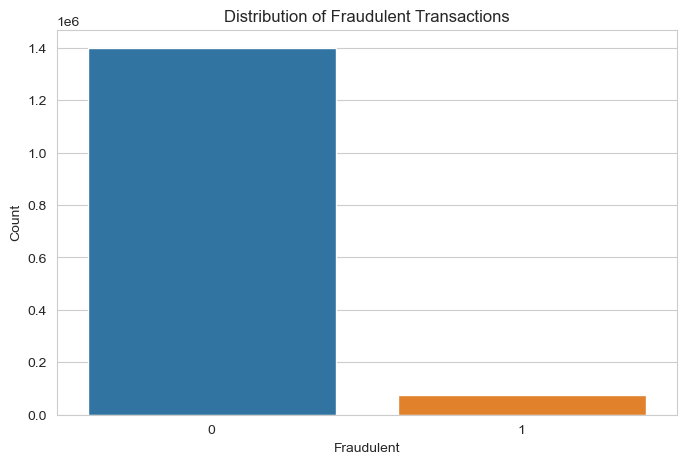

In [16]:
# Plot distribution of target variable 'fraudulent'
plt.figure(figsize=(8, 5))
sns.countplot(x='Is Fraudulent', data=train_df)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.show()

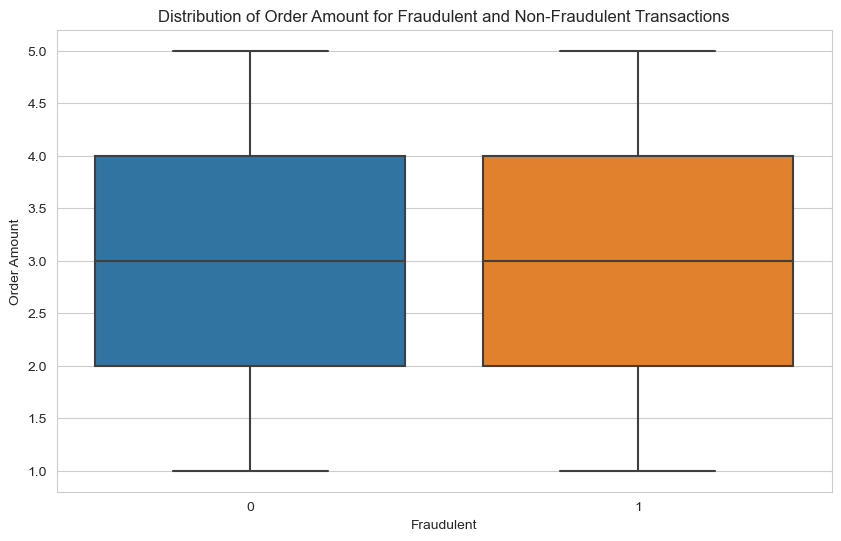

In [17]:
# Plot distribution of 'order_amount' for fraudulent and non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Is Fraudulent', y='Quantity', data=train_df)
plt.title('Distribution of Order Amount for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Fraudulent')
plt.ylabel('Order Amount')
plt.show()

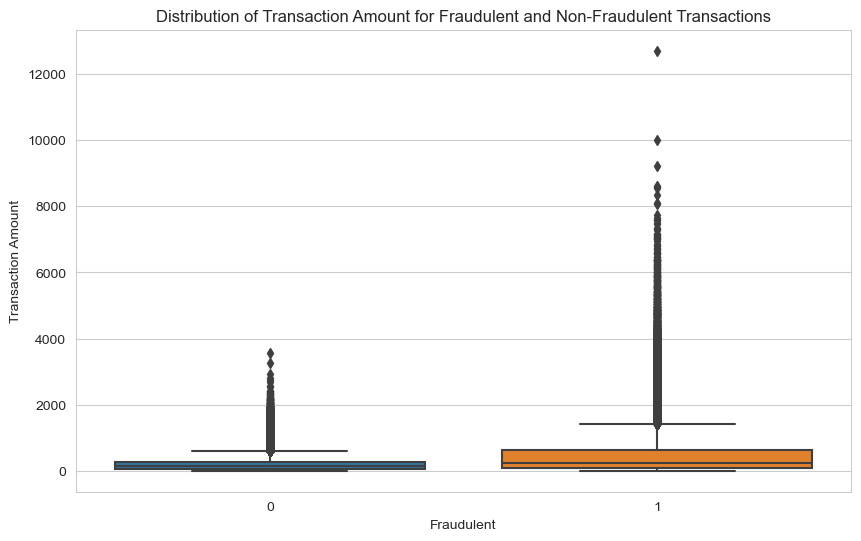

In [18]:
# Distribution of Transaction Amount for Fraudulent and Non-Fraudulent Transactions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Is Fraudulent', y='Transaction Amount', data=train_df)
plt.title('Distribution of Transaction Amount for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Fraudulent')
plt.ylabel('Transaction Amount')
plt.show()

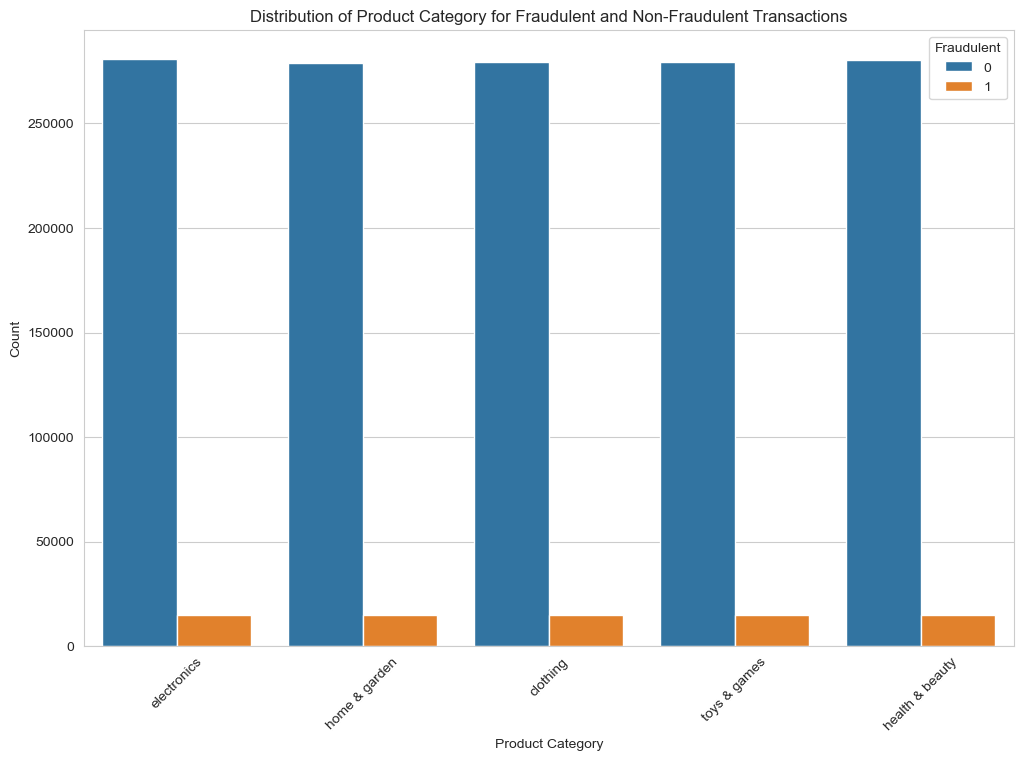

In [19]:
# Distribution of Product Category for Fraudulent and Non-Fraudulent Transactions
plt.figure(figsize=(12, 8))
sns.countplot(x='Product Category', hue='Is Fraudulent', data=train_df)
plt.title('Distribution of Product Category for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraudulent', loc='upper right')
plt.show()

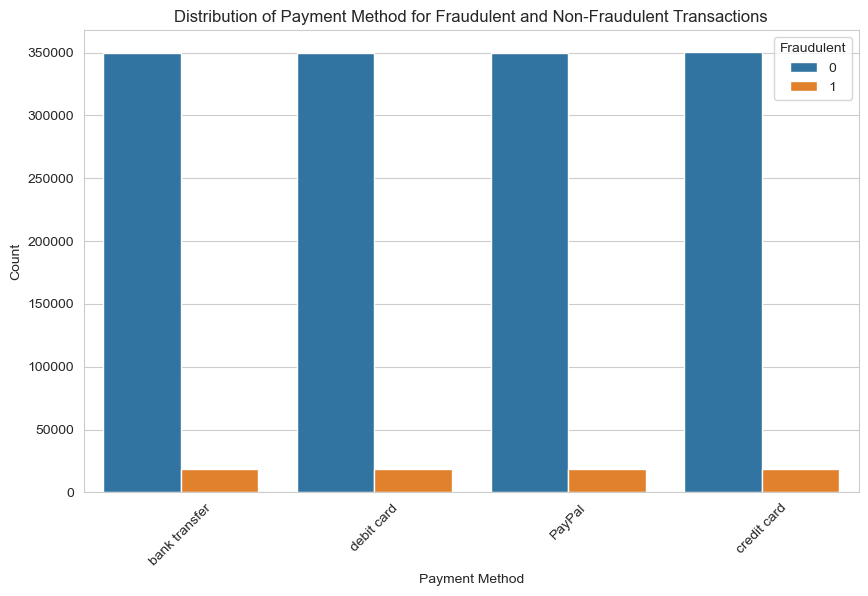

In [20]:
# Distribution of Payment Method for Fraudulent and Non-Fraudulent Transactions
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Method', hue='Is Fraudulent', data=train_df)
plt.title('Distribution of Payment Method for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraudulent', loc='upper right')
plt.show()

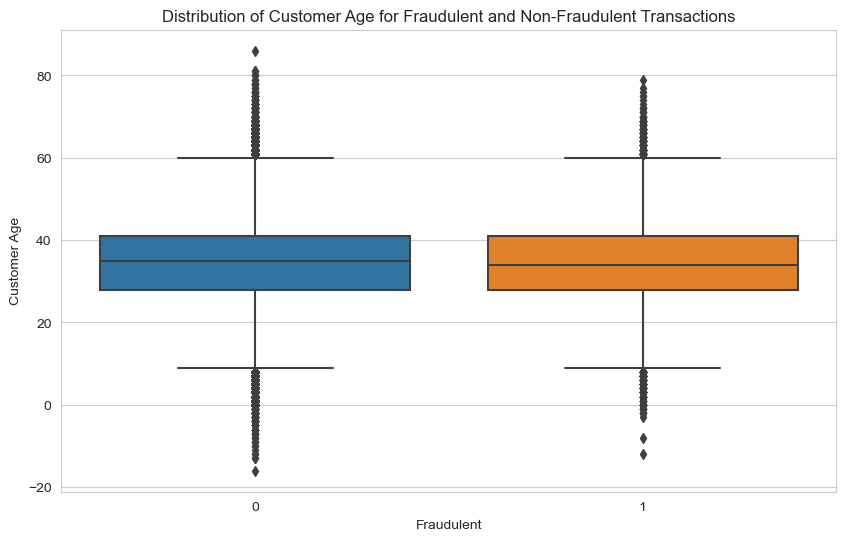

In [21]:
# Distribution of Customer Age for Fraudulent and Non-Fraudulent Transactions:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Is Fraudulent', y='Customer Age', data=train_df)
plt.title('Distribution of Customer Age for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Fraudulent')
plt.ylabel('Customer Age')
plt.show()   

# Data Cleaning

In [22]:
# checking duplicate values for train dataset
duplicates = train_df[train_df.duplicated(keep='first')]
if not duplicates.empty:
    print("Duplicates in 'dataset':")
    print(duplicates)
else:
    print("No duplicates in 'Dataset'")

No duplicates in 'Dataset'


In [23]:
# Check for null values in the train dataset
null_values = train_df.isnull().sum()

# Print the columns with null values and their counts
print(null_values)

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64


In [24]:
# checking duplicate values for test dataset
duplicates = test_df[test_df.duplicated(keep='first')]
if not duplicates.empty:
    print("Duplicates in 'dataset':")
    print(duplicates)
else:
    print("No duplicates in 'Dataset'")

No duplicates in 'Dataset'


In [25]:
# Check for null values in the test dataset
null_values = test_df.isnull().sum()

# Print the columns with null values and their counts
print(null_values)

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64


# Pre-processing of the dataset

In [26]:
train_df_subset = train_df.head(100000)

In [27]:
# Convert Transaction Date to datetime format
train_df_subset['Transaction Date'] = pd.to_datetime(train_df_subset['Transaction Date'])

# Extract relevant features and target variable
X = train_df_subset[['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days', 'Transaction Hour', 'Customer Location', 'Payment Method']]
y = train_df_subset['Is Fraudulent']

# Define categorical features
categorical_features = ['Customer Location', 'Payment Method']

# One-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

X_encoded = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Machine Learning Models

In [28]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
# Evaluate Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_accuracy_percentage = rf_accuracy * 100
print("Random Forest Accuracy:", rf_accuracy_percentage, "%")
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 95.545 %
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     19014
           1       0.78      0.13      0.23       986

    accuracy                           0.96     20000
   macro avg       0.87      0.57      0.60     20000
weighted avg       0.95      0.96      0.94     20000



In [30]:
# Confusion Matrix for Random Forest Classifier
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_conf_df = pd.DataFrame(rf_conf_matrix, index=['Actual Not Fraudulent', 'Actual Fraudulent'], columns=['Predicted Not Fraudulent', 'Predicted Fraudulent'])
print("\nConfusion Matrix for Random Forest Classifier:")
print(rf_conf_df)


Confusion Matrix for Random Forest Classifier:
                       Predicted Not Fraudulent  Predicted Fraudulent
Actual Not Fraudulent                     18978                    36
Actual Fraudulent                           855                   131


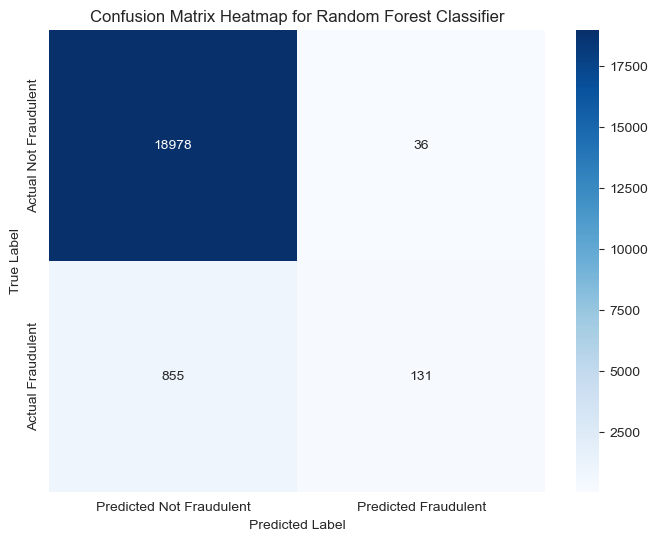

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Predicted Not Fraudulent', 'Predicted Fraudulent'], 
            yticklabels=['Actual Not Fraudulent', 'Actual Fraudulent'])
plt.title("Confusion Matrix Heatmap for Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [32]:
# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
gb_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
# Evaluate Gradient Boosting Classifier
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_accuracy_percentage = gb_accuracy * 100
print("\nGradient Boosting Accuracy:", gb_accuracy_percentage, "%")
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_predictions))


Gradient Boosting Accuracy: 95.49 %
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     19014
           1       0.68      0.16      0.26       986

    accuracy                           0.95     20000
   macro avg       0.82      0.58      0.62     20000
weighted avg       0.94      0.95      0.94     20000



In [34]:
# Confusion Matrix for Gradient Boosting Classifier
gb_conf_matrix = confusion_matrix(y_test, gb_predictions)
gb_conf_df = pd.DataFrame(gb_conf_matrix, index=['Actual Not Fraudulent', 'Actual Fraudulent'], columns=['Predicted Not Fraudulent', 'Predicted Fraudulent'])
print("\nConfusion Matrix for Gradient Boosting Classifier:")
print(gb_conf_df)


Confusion Matrix for Gradient Boosting Classifier:
                       Predicted Not Fraudulent  Predicted Fraudulent
Actual Not Fraudulent                     18942                    72
Actual Fraudulent                           830                   156


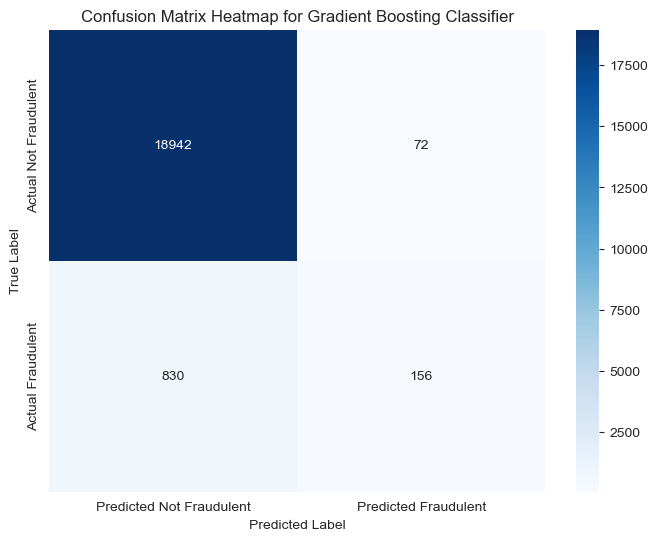

In [35]:
# Confusion Matrix Heatmap for Gradient Boosting Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(gb_conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Predicted Not Fraudulent', 'Predicted Fraudulent'], 
            yticklabels=['Actual Not Fraudulent', 'Actual Fraudulent'])
plt.title("Confusion Matrix Heatmap for Gradient Boosting Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [36]:
# DataFrame for Actual vs. Predicted data
actual_vs_predicted_df = pd.DataFrame({'Actual': y_test, 'Random Forest Predicted': rf_predictions, 'Gradient Boosting Predicted': gb_predictions})
print("\nDataFrame for Actual vs. Predicted data:")
print(actual_vs_predicted_df)


DataFrame for Actual vs. Predicted data:
       Actual  Random Forest Predicted  Gradient Boosting Predicted
75721       0                        0                            0
80184       0                        0                            0
19864       0                        0                            0
76699       0                        0                            0
92991       0                        0                            0
...       ...                      ...                          ...
32595       0                        0                            0
29313       0                        0                            0
37862       0                        0                            0
53421       0                        0                            0
42410       0                        0                            0

[20000 rows x 3 columns]


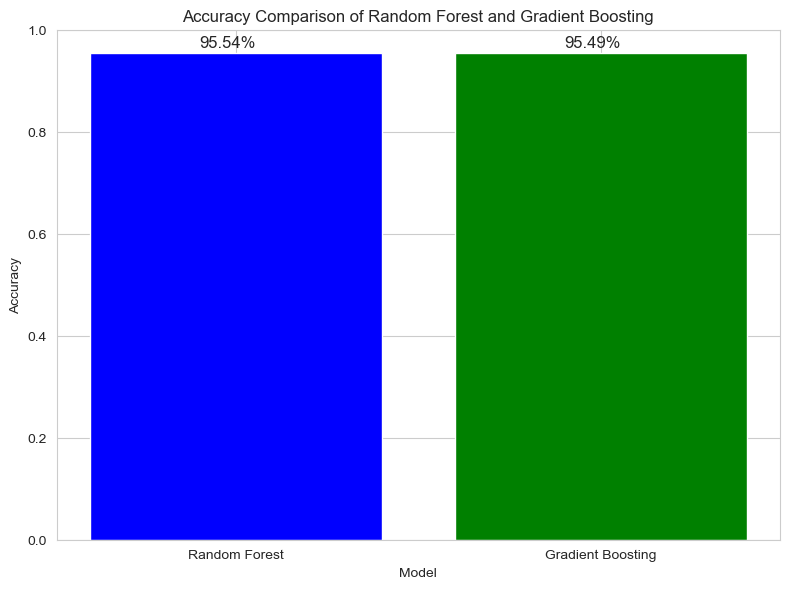

In [37]:
# Model names
model_names = ['Random Forest', 'Gradient Boosting']

# Accuracy values
accuracy_values = [rf_accuracy, gb_accuracy]

# Convert accuracy values to percentage
accuracy_percentages = [round(acc * 100, 2) for acc in accuracy_values]

# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, accuracy_values, color=['blue', 'green'])

# Adding accuracy values on top of the bars
for bar, acc in zip(bars, accuracy_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f"{acc}%", fontsize=12)

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Random Forest and Gradient Boosting')
plt.ylim(0, 1)  # Limiting y-axis from 0 to 1 for accuracy percentage
plt.tight_layout()
plt.show()